In [1]:
import yfinance as yf

meli34 = yf.Ticker("MELI34.SA")
df_meli34 = meli34.history(start="2021-01-01",end="2023-12-30")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import root_mean_squared_error
train_size = int(len(df_meli34) * 0.8)
train, test = df_meli34[0:train_size], df_meli34[train_size:len(df_meli34)]

# 
model_train = ARIMA(train['Close'], order=(10, 0, 10))
model_train_fit = model_train.fit()

test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean.to_numpy(), index=test.index)

# Calculate the mean squared error
rmse = root_mean_squared_error(test['Close'], test_forecast_series)
rmse


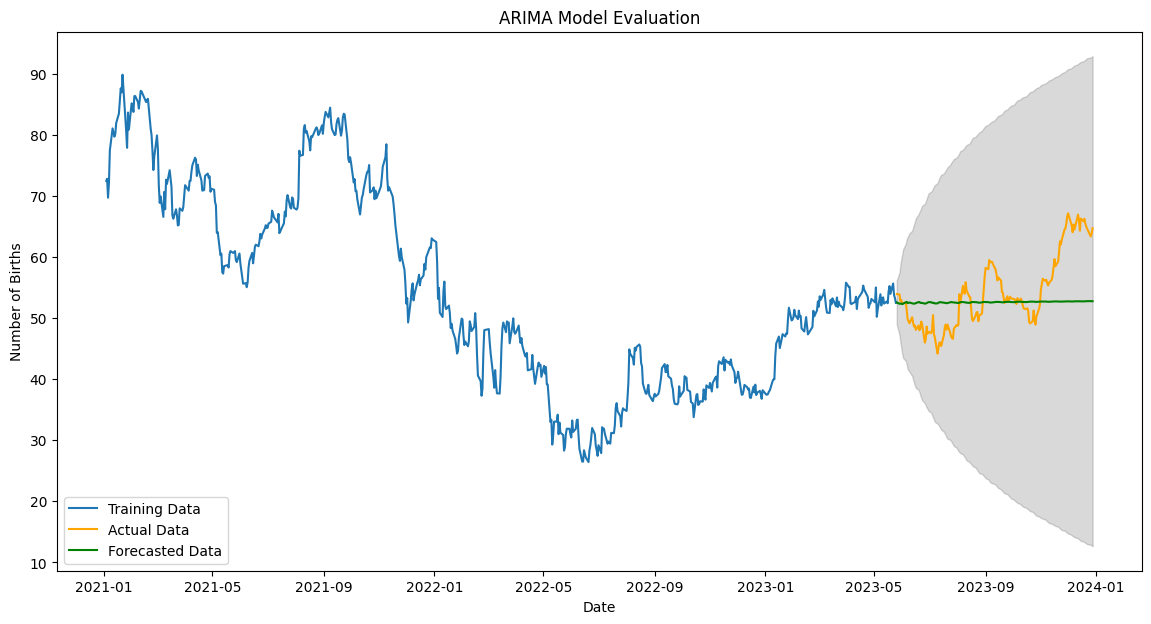

In [3]:
# Create a plot to compare the forecast with the actual test data
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

